<a href="https://colab.research.google.com/github/zafor158/E-Commerece-Data-Analysis/blob/main/E_commerce_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df_ = pd.read_csv("/content/retail_data.csv",encoding='iso-8859-9')

In [ ]:
df = df_.copy() # We work with a copy every time so we don't run main dataset again.
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
df.shape

(525461, 8)

In [ ]:
df.describe()

,Quantity,Price,Customer ID
count,525461.000000,525461.000000,417534.000000
mean,10.337667,4.688834,15360.645478
std,107.424110,146.126914,1680.811316
min,-9600.000000,-53594.360000,12346.000000
25%,1.000000,1.250000,13983.000000
50%,3.000000,2.100000,15311.000000
75%,10.000000,4.210000,16799.000000
max,19152.000000,25111.090000,18287.000000


In [ ]:
df.isnull().sum()

,0
Invoice,0
StockCode,0
Description,2928
Quantity,0
InvoiceDate,0
Price,0
Customer ID,107927
Country,0




    
* As seen, there is missing data in the Customer ID and Description features.
* Let's remove these missing rows and apply the other operations one by one to prepare the data.

In [ ]:
df.dropna(inplace=True)

In [ ]:
df = df[~df["Invoice"].str.contains("C", na=False)]


    
* The "C" expression represents canceled transactions. Therefore, since these values were added as negative values, the minimum values appear as missing in the describe check. Therefore, we need to clean this data.

In [ ]:
df = df[df["Quantity"] > 0]
df = df[df["Price"] > 0]


    
* We are adjusting our new threshold values because Price and Quantity cannot take on a value of zero or below.

----

In [ ]:
def corr_skew_outliner(df, cols):

    for col in cols:

        Q1 = df[col].quantile(0.05)
        Q3 = df[col].quantile(0.95)
        df.loc[df[col] < Q1, col] = Q1
        df.loc[df[col] > Q3, col] = Q3
        #df[col] = np.sqrt(df[col])

    return df

In [ ]:
cols = ["Quantity","Price"]

corr_skew_outliner(df,cols)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",36,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [ ]:
df.describe()

,Quantity,Price,Customer ID
count,407664.000000,407664.000000,407664.000000
mean,8.598140,2.778797,15368.592598
std,9.466147,2.290195,1679.762138
min,1.000000,0.420000,12346.000000
25%,2.000000,1.250000,13997.000000
50%,5.000000,1.950000,15321.000000
75%,12.000000,3.750000,16812.000000
max,36.000000,8.500000,18287.000000


In [ ]:
# Save the DataFrame as a CSV file
df.to_csv('preprocessed_data.csv', index=False)

In [ ]:
# # Download the file to your local machine
# from google.colab import files
# files.download('preprocessed_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Data Visualization

# Import Necessary Libraries

In [ ]:
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot, plot, download_plotlyjs
init_notebook_mode(connected=True)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Number of transanctions done for each country

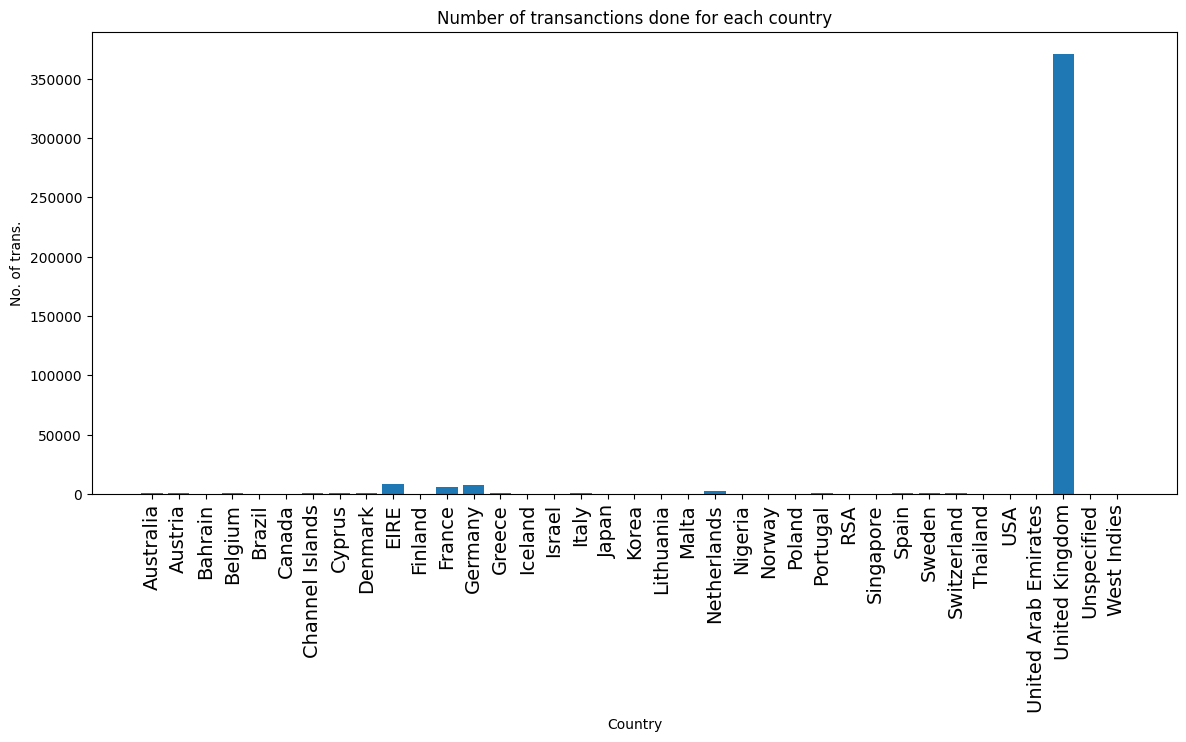

In [ ]:
plt.figure(figsize=(14,6))
plt.bar(list(df.groupby(['Country']).groups.keys()), df.groupby(['Country'])['Customer ID'].count())
plt.xticks(rotation = 90, fontsize = 14)
plt.title("Number of transanctions done for each country")
plt.ylabel("No. of trans.")
plt.xlabel("Country")
plt.show()

# Most of the transanction done by the country

In [ ]:
info = pd.DataFrame(data = df.groupby(['Country'])['Invoice'].nunique(), index=df.groupby(['Country']).groups.keys()).T
info

,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,Denmark,EIRE,...,Singapore,Spain,Sweden,Switzerland,Thailand,USA,United Arab Emirates,United Kingdom,Unspecified,West Indies
Invoice,40,28,2,52,1,2,30,21,26,316,...,4,66,68,40,2,15,8,17612,8,1




*   UK has done most of the transanctions. (17612)
*   Least amount of transanctions were made by countries like Brazil, RSA etc. (only 1)





In [ ]:
print(len(df['StockCode'].value_counts()))

4017


# We will see how many different products were sold in the year data was collected.

In [ ]:
print(len(df['Invoice'].value_counts()))

19213


# We will see how many different transanctions were done.

In [ ]:
df['Description'].value_counts().head(15)

,count
Description,
WHITE HANGING HEART T-LIGHT HOLDER,3153
REGENCY CAKESTAND 3 TIER,1705
STRAWBERRY CERAMIC TRINKET BOX,1407
ASSORTED COLOUR BIRD ORNAMENT,1369
HOME BUILDING BLOCK WORD,1219
PACK OF 72 RETRO SPOT CAKE CASES,1204
60 TEATIME FAIRY CAKE CASES,1189
REX CASH+CARRY JUMBO SHOPPER,1189
LUNCH BAG RED SPOTTY,1084


# Here we can see our best selling products, items that appear in orders the most often. Also to make it visually more appealing let's create a bar chart for 15 top items.

<ipython-input-21-2284bd009f0c>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




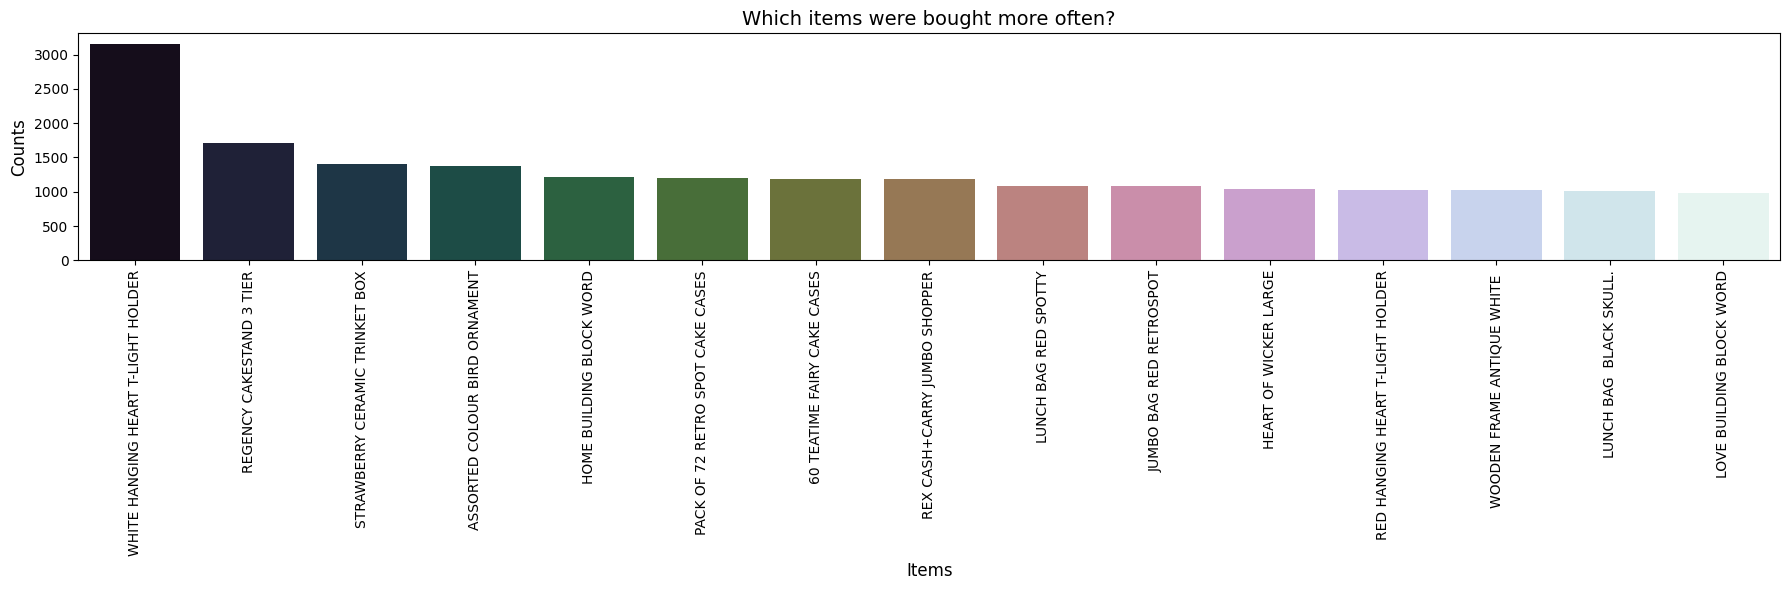

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and 'Description' is the column with item names
item_counts = df['Description'].value_counts().sort_values(ascending=False).iloc[0:15]

# Plot
plt.figure(figsize=(18, 6))
sns.barplot(x=item_counts.index, y=item_counts.values, palette="cubehelix")  # Updated the palette usage
plt.ylabel("Counts", fontsize=12)
plt.xlabel("Items", fontsize=12)
plt.title("Which items were bought more often?", fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()  # Ensures labels fit into the plot
plt.show()

In [ ]:
print( "We have {} countires trading all over the world ".format(df.Country.nunique()))

We have 37 countires trading all over the world 


In [ ]:
countries = df.Country.value_counts()
data = dict(type='choropleth',
            locations = countries.index,
            locationmode = 'country names', z = countries,
            text = countries.index, colorbar = {'title':'Orders'},
            colorscale= 'Reds',
            reversescale = False
           )
layout = dict(title='Geographic View',
                geo = dict(showframe = True, projection=dict(type = 'winkel tripel'))
             )
gmap = go.Figure(data = [data], layout = layout)
py.iplot(gmap)

# Install MRjob

In [ ]:
!pip install mrjob

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.6/439.6 kB 5.8 MB/s eta 0:00:00


# Apriori Algorithmn using Mrjob

In [ ]:
%%writefile AprioriMRJob.py
from mrjob.job import MRJob
from mrjob.step import MRStep

class AprioriMR(MRJob):
    def configure_args(self):
        super(AprioriMR, self).configure_args()
        self.add_passthru_arg('--min_support', type=int, default=2, help="Minimum support threshold")
        self.add_passthru_arg('--stage', type=int, default=1, help="Stage of the Apriori process")

    def mapper(self, _, line):
        # Read transaction and split items (StockCode, Description, Quantity)
        fields = line.strip().split(',')
        if len(fields) < 3:
            return  # Ignore malformed rows

        stock_code = fields[1].strip()
        description = fields[2].strip()
        try:
            quantity = int(fields[3].strip())
        except ValueError:
            return  # Ignore rows with invalid quantity

        # Use StockCode and Description as the unique identifier for items
        item = (stock_code, description)

        stage = self.options.stage

        # Generate candidate itemsets
        if stage == 1:
            # Single-itemsets
            yield (item,), quantity
        else:
            # Multi-itemsets generation requires combining items from the same transaction
            # Transactions need to be grouped externally (assumes input pre-grouped by customer/order)
            # This section needs specific handling based on grouped data structure
            pass

    def reducer(self, itemset, quantities):
        # Aggregate quantities for each itemset
        total_quantity = sum(quantities)
        if total_quantity >= self.options.min_support:
            # Emit each itemset and its total quantity
            yield None, (itemset, total_quantity)

    def reducer_find_top_10(self, _, itemsets_with_quantity):
        # Collect all itemsets with their quantities
        itemsets = list(itemsets_with_quantity)

        # Sort by quantity in descending order and take the top 10
        top_10 = sorted(itemsets, key=lambda x: x[1], reverse=True)[:10]

        # Yield the top 10 results
        for itemset, quantity in top_10:
            yield itemset, quantity

    def steps(self):
        return [
            MRStep(mapper=self.mapper, reducer=self.reducer),
            MRStep(reducer=self.reducer_find_top_10),
        ]

if __name__ == '__main__':
    AprioriMR.run()


Writing AprioriMRJob.py


In [ ]:
!python AprioriMRJob.py "/content/preprocessed_data.csv" >> frequent_itemset.txt


No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/AprioriMRJob.root.20241120.204147.602107
Running step 1 of 2...
Running step 2 of 2...
job output is in /tmp/AprioriMRJob.root.20241120.204147.602107/output
Streaming final output from /tmp/AprioriMRJob.root.20241120.204147.602107/output...
Removing temp directory /tmp/AprioriMRJob.root.20241120.204147.602107...


In [ ]:
!cat frequent_itemset.txt

[["85123A", "WHITE HANGING HEART T-LIGHT HOLDER"]]	39045
[["21212", "PACK OF 72 RETRO SPOT CAKE CASES"]]	24636
[["84879", "ASSORTED COLOUR BIRD ORNAMENT"]]	23106
[["84991", "60 TEATIME FAIRY CAKE CASES"]]	20710
[["21232", "STRAWBERRY CERAMIC TRINKET BOX"]]	18342
[["21977", "PACK OF 60 PINK PAISLEY CAKE CASES"]]	16953
[["84077", "WORLD WAR 2 GLIDERS ASSTD DESIGNS"]]	16247
[["85099B", "JUMBO BAG RED RETROSPOT"]]	14800
[["20725", "LUNCH BAG RED SPOTTY"]]	12419
[["84270", "ASSTD DESIGN BUBBLE GUM RING"]]	12396


Country Wise Quantity

In [ ]:
%%writefile AprioriMRJob_Countrywise.py
from mrjob.job import MRJob
from mrjob.step import MRStep

class AprioriMR(MRJob):
    def configure_args(self):
        super(AprioriMR, self).configure_args()
        self.add_passthru_arg('--min_support', type=int, default=2, help="Minimum support threshold")
        self.add_passthru_arg('--stage', type=int, default=1, help="Stage of the Apriori process")

    def mapper(self, _, line):
        # Read transaction and split items (StockCode, Description, Quantity)
        fields = line.strip().split(',')
        if len(fields) < 3:
            return  # Ignore malformed rows

        country = fields[7].strip()
        try:
            quantity = int(fields[3].strip())
        except ValueError:
            return  # Ignore rows with invalid quantity

        # Use StockCode and Description as the unique identifier for items
        item = (country)

        stage = self.options.stage

        # Generate candidate itemsets
        if stage == 1:
            # Single-itemsets
            yield (item,), quantity
        else:
            # Multi-itemsets generation requires combining items from the same transaction
            # Transactions need to be grouped externally (assumes input pre-grouped by customer/order)
            # This section needs specific handling based on grouped data structure
            pass

    def reducer(self, itemset, quantities):
        # Aggregate quantities for each itemset
        total_quantity = sum(quantities)
        if total_quantity >= self.options.min_support:
            # Emit each itemset and its total quantity
            yield None, (itemset, total_quantity)

    def reducer_find_top_10(self, _, itemsets_with_quantity):
        # Collect all itemsets with their quantities
        itemsets = list(itemsets_with_quantity)

        # Sort by quantity in descending order and take the top 10
        top_10 = sorted(itemsets, key=lambda x: x[1], reverse=True)[:10]

        # Yield the top 10 results
        for itemset, quantity in top_10:
            yield itemset, quantity

    def steps(self):
        return [
            MRStep(mapper=self.mapper, reducer=self.reducer),
            MRStep(reducer=self.reducer_find_top_10),
        ]

if __name__ == '__main__':
    AprioriMR.run()


Writing AprioriMRJob_Countrywise.py


In [ ]:
!python AprioriMRJob_Countrywise.py "/content/preprocessed_data.csv" >> frequent_itemset_country.txt

No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/AprioriMRJob_Countrywise.root.20241120.204314.332639
Running step 1 of 2...
Running step 2 of 2...
job output is in /tmp/AprioriMRJob_Countrywise.root.20241120.204314.332639/output
Streaming final output from /tmp/AprioriMRJob_Countrywise.root.20241120.204314.332639/output...
Removing temp directory /tmp/AprioriMRJob_Countrywise.root.20241120.204314.332639...


In [ ]:
!cat frequent_itemset_country.txt

["United Kingdom"]	2949861
["EIRE"]	102928
["Germany"]	90729
["France"]	65368
["Netherlands"]	57972
["Switzerland"]	17270
["Sweden"]	16717
["Spain"]	13611
["Belgium"]	11205
["Portugal"]	10975


Price wise Quantity

In [ ]:
%%writefile AprioriMRJob_Price.py
from mrjob.job import MRJob
from mrjob.step import MRStep

class AprioriMR(MRJob):
    def configure_args(self):
        super(AprioriMR, self).configure_args()
        self.add_passthru_arg('--min_support', type=int, default=2, help="Minimum support threshold")
        self.add_passthru_arg('--stage', type=int, default=1, help="Stage of the Apriori process")

    def mapper(self, _, line):
        # Read transaction and split items (StockCode, Description, Quantity)
        fields = line.strip().split(',')
        if len(fields) < 3:
            return  # Ignore malformed rows

        price = fields[5].strip()
        try:
            quantity = int(fields[3].strip())
        except ValueError:
            return  # Ignore rows with invalid quantity

        # Use StockCode and Description as the unique identifier for items
        item = (price)

        stage = self.options.stage

        # Generate candidate itemsets
        if stage == 1:
            # Single-itemsets
            yield (item,), quantity
        else:
            # Multi-itemsets generation requires combining items from the same transaction
            # Transactions need to be grouped externally (assumes input pre-grouped by customer/order)
            # This section needs specific handling based on grouped data structure
            pass

    def reducer(self, itemset, quantities):
        # Aggregate quantities for each itemset
        total_quantity = sum(quantities)
        if total_quantity >= self.options.min_support:
            # Emit each itemset and its total quantity
            yield None, (itemset, total_quantity)

    def reducer_find_top_10(self, _, itemsets_with_quantity):
        # Collect all itemsets with their quantities
        itemsets = list(itemsets_with_quantity)

        # Sort by quantity in descending order and take the top 10
        top_10 = sorted(itemsets, key=lambda x: x[1], reverse=True)[:10]

        # Yield the top 10 results
        for itemset, quantity in top_10:
            yield itemset, quantity

    def steps(self):
        return [
            MRStep(mapper=self.mapper, reducer=self.reducer),
            MRStep(reducer=self.reducer_find_top_10),
        ]

if __name__ == '__main__':
    AprioriMR.run()


Writing AprioriMRJob_Price.py


In [ ]:
!python AprioriMRJob_Price.py "/content/preprocessed_data.csv" >> frequent_itemset_Price.txt

No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/AprioriMRJob_Price.root.20241120.204429.849815
Running step 1 of 2...
Running step 2 of 2...
job output is in /tmp/AprioriMRJob_Price.root.20241120.204429.849815/output
Streaming final output from /tmp/AprioriMRJob_Price.root.20241120.204429.849815/output...
Removing temp directory /tmp/AprioriMRJob_Price.root.20241120.204429.849815...


In [ ]:
!cat frequent_itemset_Price.txt

["0.42"]	544093
["1.25"]	475566
["0.85"]	368761
["1.65"]	291699
["2.95"]	189656
["2.55"]	159207
["2.1"]	159182
["1.95"]	155059
["0.55"]	132374
["1.45"]	120809


# Association Rule

In [ ]:
%%writefile AssociationRuleMRJob.py
from mrjob.job import MRJob
from mrjob.step import MRStep
from itertools import combinations

class AssociationRuleMR(MRJob):
    def configure_args(self):
        super(AssociationRuleMR, self).configure_args()
        self.add_passthru_arg('--min_support', type=int, default=5, help="Minimum support threshold")
        self.add_passthru_arg('--min_confidence', type=float, default=0.7, help="Minimum confidence threshold")

    def mapper(self, _, line):
        # Parse the transaction data: StockCode, Description, Quantity, Price, Country
        fields = line.strip().split(',')
        if len(fields) < 5:
            return  # Ignore malformed rows

        stock_code = fields[1].strip()
        description = fields[2].strip()
        try:
            quantity = int(fields[3].strip())
            price = float(fields[5].strip())
            country = fields[7].strip()
        except ValueError:
            return  # Ignore rows with invalid numerical values

        # Combine relevant fields for item identification
        item = (stock_code, description, price, country)

        # Emit single-item transactions
        yield (item,), 1

    def reducer(self, itemset, counts):
        # Aggregate counts for each itemset
        total_support = sum(counts)
        if total_support >= self.options.min_support:
            yield itemset, total_support

    def mapper_generate_rules(self, itemset, support):
        # Generate association rules
        items = itemset[0]
        if len(items) > 1:
            for n in range(1, len(items)):
                for antecedent in combinations(items, n):
                    consequent = tuple(set(items) - set(antecedent))
                    yield (antecedent, consequent), (support,)

    def reducer_calculate_confidence(self, rule, supports):
        # Calculate confidence and filter rules
        antecedent, consequent = rule
        all_supports = list(supports)

        # Support for the full itemset
        full_support = all_supports[0][0]

        # Support for the antecedent (assumes single record for each key)
        antecedent_support = full_support

        # Calculate confidence
        confidence = full_support / antecedent_support if antecedent_support else 0

        # Filter by minimum confidence
        if confidence >= self.options.min_confidence:
            yield f"Rule: {antecedent} -> {consequent}", f"Confidence: {confidence:.2f}, Support: {full_support}"

    def steps(self):
        return [
            MRStep(mapper=self.mapper, reducer=self.reducer),
            MRStep(mapper=self.mapper_generate_rules, reducer=self.reducer_calculate_confidence)
        ]

if __name__ == '__main__':
    AssociationRuleMR.run()


Writing AssociationRuleMRJob.py


In [ ]:
!python AssociationRuleMRJob.py "/content/preprocessed_data.csv"--min_support 5 --min_confidence 0.7


Streaming output truncated to the last 5000 lines.
"Rule: ['PINK/WHITE CHRISTMAS TREE 60CM', 1.25, 'United Kingdom'] -> ['35598D']"	"Confidence: 1.00, Support: 7"
"Rule: ['PINK/WHITE CHRISTMAS TREE 60CM', 1.25] -> ['35598D', 'United Kingdom']"	"Confidence: 1.00, Support: 7"
"Rule: ['PINK/WHITE CHRISTMAS TREE 60CM'] -> [0.65, '35598D', 'Germany']"	"Confidence: 1.00, Support: 5"
"Rule: ['PINK/WHITE CHRISTMAS TREE 60CM'] -> [0.65, '35598D', 'United Kingdom']"	"Confidence: 1.00, Support: 15"
"Rule: ['PINK/WHITE CHRISTMAS TREE 60CM'] -> [1.25, '35598D', 'United Kingdom']"	"Confidence: 1.00, Support: 7"
"Rule: ['PINK/WHITE RIBBED MELAMINE JUG', 'United Kingdom'] -> ['84562A', 7.95]"	"Confidence: 1.00, Support: 53"
"Rule: ['PINK/WHITE RIBBED MELAMINE JUG', 7.95, 'United Kingdom'] -> ['84562A']"	"Confidence: 1.00, Support: 53"
"Rule: ['PINK/WHITE RIBBED MELAMINE JUG', 7.95] -> ['84562A', 'United Kingdom']"	"Confidence: 1.00, Support: 53"
"Rule: ['PINK/WHITE RIBBED MELAMINE JUG'] -> ['84562A', 